In [1]:
from music21 import *
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pickle

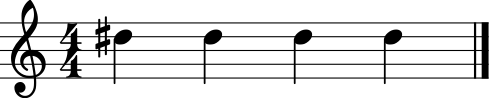

In [2]:
#Transpose one piece
stream2 = stream.Stream()
n3 = note.Note('D#5') # octave values can be included in creation arguments
stream2.repeatAppend(n3, 4)
stream2.show()

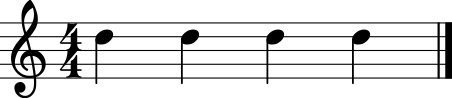

In [3]:
#Example of transposing a stream down 5 half steps
s_down = stream2.transpose(-1)
s_down.show()

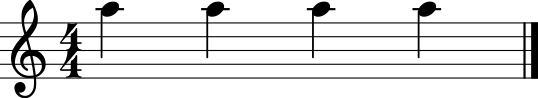

In [4]:
#Example of transposing a stream up 6 half steps
s_up = stream2.transpose(6)
s_up.show()

In [5]:
# Collect all pitches and rhythms in the corpus 
bachCorpus = corpus.getComposer('bach')
chorales_train = [] #all chorales stored as a list

# Keep track of all features encountered
all_durations = []
all_notes = []

for piece in bachCorpus:    
    pieceScore = corpus.parse(piece)  # stream.Score object
    melodyPart = pieceScore.getElementsByClass('Part')[0]  # melody parts are always the first part in the score
    melodyNotes = melodyPart.flat.getElementsByClass('Note') #extract all notes in the part
    
    print('Processing chorale: {}'.format(pieceScore.metadata.title))

    
    #Extract note pitches and rhythms
    # --------------------------------
    noteSequence = [] #series of all notes in order, from start to end of piece
    for n in melodyNotes.recurse():  # iterates through all notes in the piece
        midiNote = n.pitch.midi
        noteDuration = n.duration.quarterLength
        noteTuple = (midiNote, noteDuration) # (MIDI_pitch, note_duration)
        
        # Keep track of all notes and durations seen thus far
        all_durations.append(noteDuration) 
        all_notes.append(midiNote)
            
        noteSequence.append(noteTuple) # appends the next time step to the sample
        
    chorales_train.append(noteSequence) #store this piece's sequence of notes in master list

Processing chorale: bwv1.6.mxl
Processing chorale: bwv10.7.mxl
Processing chorale: bwv101.7.mxl
Processing chorale: bwv102.7.mxl
Processing chorale: bwv103.6.mxl
Processing chorale: bwv104.6.mxl
Processing chorale: bwv108.6.mxl
Processing chorale: bwv11.6.mxl
Processing chorale: bwv110.7.mxl
Processing chorale: bwv111.6.mxl
Processing chorale: bwv112.5-sc.mxl
Processing chorale: bwv112.5.mxl
Processing chorale: bwv113.8.mxl
Processing chorale: bwv114.7.mxl
Processing chorale: bwv115.6.mxl
Processing chorale: bwv116.6.mxl
Processing chorale: bwv117.4.mxl
Processing chorale: bwv119.9.mxl
Processing chorale: bwv12.7.mxl
Processing chorale: bwv120.6.mxl
Processing chorale: bwv120.8-a.mxl
Processing chorale: bwv121.6.mxl
Processing chorale: bwv122.6.mxl
Processing chorale: bwv123.6.mxl
Processing chorale: bwv124.6.mxl
Processing chorale: bwv125.6.mxl
Processing chorale: bwv126.6.mxl
Processing chorale: bwv127.5.mxl
Processing chorale: bwv128.5.mxl
Processing chorale: bwv13.6.mxl
Processing 

Processing chorale: bwv347.mxl
Processing chorale: bwv348.mxl
Processing chorale: bwv349.mxl
Processing chorale: bwv350.mxl
Processing chorale: bwv351.mxl
Processing chorale: bwv352.mxl
Processing chorale: bwv353.mxl
Processing chorale: bwv354.mxl
Processing chorale: bwv355.mxl
Processing chorale: bwv356.mxl
Processing chorale: bwv357.mxl
Processing chorale: bwv358.mxl
Processing chorale: bwv359.mxl
Processing chorale: bwv36.4-2.mxl
Processing chorale: bwv36.8-2.mxl
Processing chorale: bwv360.mxl
Processing chorale: bwv361.mxl
Processing chorale: bwv362.mxl
Processing chorale: bwv363.mxl
Processing chorale: bwv364.mxl
Processing chorale: bwv365.mxl
Processing chorale: 113. Ihr Gestirn', ihr hohen L\u3fte
Processing chorale: bwv366.mxl
Processing chorale: bwv367.mxl
Processing chorale: bwv368.mxl
Processing chorale: bwv369.mxl
Processing chorale: bwv37.6.mxl
Processing chorale: bwv370.mxl
Processing chorale: bwv371.mxl
Processing chorale: bwv372.mxl
Processing chorale: bwv373.mxl
Proces

In [6]:
print('Pieces in corpus: ', len(chorales_train))

Pieces in corpus:  433


In [46]:
#View pitch MIDI value frequencies of all chorale soprano parts (unchanged)
notes_dict = Counter(all_notes)
#notes_dict

Counter({65: 748,
         67: 2139,
         60: 153,
         53: 20,
         57: 50,
         70: 1110,
         69: 3305,
         72: 2375,
         71: 2671,
         64: 707,
         74: 2778,
         77: 478,
         75: 467,
         62: 399,
         76: 1322,
         73: 1171,
         63: 76,
         68: 382,
         66: 705,
         78: 455,
         79: 501,
         82: 50,
         81: 314,
         84: 72,
         80: 20,
         83: 150,
         85: 38,
         86: 77,
         88: 13,
         59: 27,
         55: 42,
         58: 10,
         61: 12,
         50: 2})

In [47]:
notes = sorted(notes_dict.most_common())
notes

[(50, 2),
 (53, 20),
 (55, 42),
 (57, 50),
 (58, 10),
 (59, 27),
 (60, 153),
 (61, 12),
 (62, 399),
 (63, 76),
 (64, 707),
 (65, 748),
 (66, 705),
 (67, 2139),
 (68, 382),
 (69, 3305),
 (70, 1110),
 (71, 2671),
 (72, 2375),
 (73, 1171),
 (74, 2778),
 (75, 467),
 (76, 1322),
 (77, 478),
 (78, 455),
 (79, 501),
 (80, 20),
 (81, 314),
 (82, 50),
 (83, 150),
 (84, 72),
 (85, 38),
 (86, 77),
 (88, 13)]

In [48]:
midi_vals = [pair[0] for pair in notes]
#midi_vals
midi_freq = [pair[1] for pair in notes]
#midi_freq

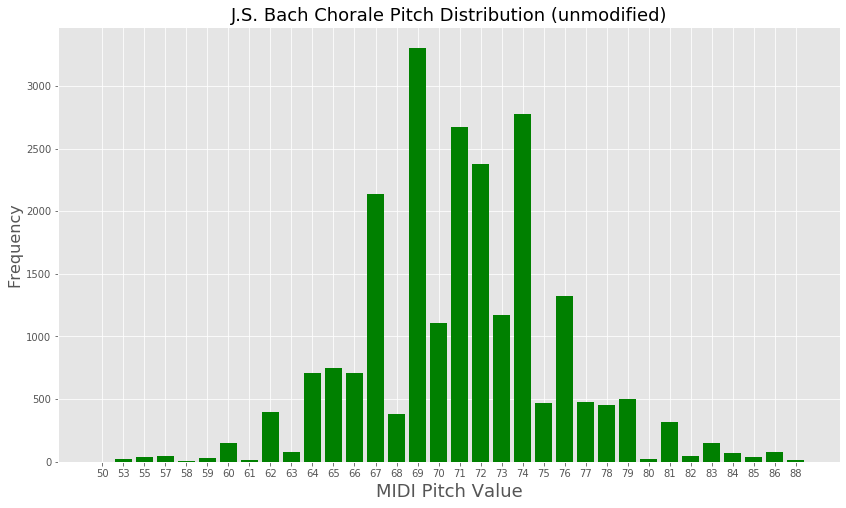

In [51]:
plt.figure(figsize=(14,8))
plt.bar(range(len(notes)), midi_freq, align='center', color='green')
plt.xticks(range(len(notes)), midi_vals)
plt.xlabel("MIDI Pitch Value", fontsize=18)
plt.ylabel("Frequency", fontsize=16)
plt.title("J.S. Bach Chorale Pitch Distribution (unmodified)", fontsize=18)
plt.savefig('../figures/orig_midipitch_distr.png', dpi=300)
plt.show()

In [9]:
orig_melRange = list(notes_dict.keys())
orig_melRange.sort()

In [10]:
#orig_melRange

In [11]:
len(orig_melRange)

In [12]:
#Transposes corpus pieces to all 12 keys, up 6 and down 5 half steps (maintains major/minor)
# ------------------------------------------------------------------

#all chorales (pieces) stored in a master list
transposed_train = [] 
transposed_pitches_train = []
transposed_durations_train = []

# Keep track of all features encountered in a flat 1-D list
all_transposed_durations = []
all_transposed_notes = []

bachCorpus = corpus.getComposer('bach')
for piece in bachCorpus:    
    pieceScore = corpus.parse(piece)  # stream.Score object
    melodyPart = pieceScore.getElementsByClass('Part')[0]  # melody parts are always the first part in the score
    melodyNotes = melodyPart.flat.getElementsByClass('Note') #extract all notes in the part
    
    print('Processing chorale: {}'.format(pieceScore.metadata.title))

    #Transpose all pitches within the range of +6 to -5 half steps (including the unaltered version)
    for i in range(6,-6,-1):
        #Transpose the melody part
        m_transposed = melodyNotes.transpose(i)
        
        #Extract note pitches and rhythms
        # --------------------------------
        #series of all notes in order, from start to end of piece
        durationSequence = []
        pitchSequence = []
        noteSequence = [] 
        for n in m_transposed.recurse():  # iterates through all notes in the piece
            midiNote = n.pitch.midi
            noteDuration = n.duration.quarterLength
            noteTuple = (midiNote, noteDuration) # (MIDI_pitch, note_duration)

            # Keep track of all notes and durations seen thus far
            all_transposed_durations.append(noteDuration) 
            all_transposed_notes.append(midiNote)

            # appends the next time step to the sample
            durationSequence.append(noteDuration)
            pitchSequence.append(midiNote)
            noteSequence.append(noteTuple) 

        #store sequences (pieces) in master list
        transposed_durations_train.append(durationSequence)
        transposed_pitches_train.append(pitchSequence)
        transposed_train.append(noteSequence) 

Processing chorale: bwv1.6.mxl
Processing chorale: bwv10.7.mxl
Processing chorale: bwv101.7.mxl
Processing chorale: bwv102.7.mxl
Processing chorale: bwv103.6.mxl
Processing chorale: bwv104.6.mxl
Processing chorale: bwv108.6.mxl
Processing chorale: bwv11.6.mxl
Processing chorale: bwv110.7.mxl
Processing chorale: bwv111.6.mxl
Processing chorale: bwv112.5-sc.mxl
Processing chorale: bwv112.5.mxl
Processing chorale: bwv113.8.mxl
Processing chorale: bwv114.7.mxl
Processing chorale: bwv115.6.mxl
Processing chorale: bwv116.6.mxl
Processing chorale: bwv117.4.mxl
Processing chorale: bwv119.9.mxl
Processing chorale: bwv12.7.mxl
Processing chorale: bwv120.6.mxl
Processing chorale: bwv120.8-a.mxl
Processing chorale: bwv121.6.mxl
Processing chorale: bwv122.6.mxl
Processing chorale: bwv123.6.mxl
Processing chorale: bwv124.6.mxl
Processing chorale: bwv125.6.mxl
Processing chorale: bwv126.6.mxl
Processing chorale: bwv127.5.mxl
Processing chorale: bwv128.5.mxl
Processing chorale: bwv13.6.mxl
Processing 

Processing chorale: bwv346.mxl
Processing chorale: bwv347.mxl
Processing chorale: bwv348.mxl
Processing chorale: bwv349.mxl
Processing chorale: bwv350.mxl
Processing chorale: bwv351.mxl
Processing chorale: bwv352.mxl
Processing chorale: bwv353.mxl
Processing chorale: bwv354.mxl
Processing chorale: bwv355.mxl
Processing chorale: bwv356.mxl
Processing chorale: bwv357.mxl
Processing chorale: bwv358.mxl
Processing chorale: bwv359.mxl
Processing chorale: bwv36.4-2.mxl
Processing chorale: bwv36.8-2.mxl
Processing chorale: bwv360.mxl
Processing chorale: bwv361.mxl
Processing chorale: bwv362.mxl
Processing chorale: bwv363.mxl
Processing chorale: bwv364.mxl
Processing chorale: bwv365.mxl
Processing chorale: 113. Ihr Gestirn', ihr hohen L\u3fte
Processing chorale: bwv366.mxl
Processing chorale: bwv367.mxl
Processing chorale: bwv368.mxl
Processing chorale: bwv369.mxl
Processing chorale: bwv37.6.mxl
Processing chorale: bwv370.mxl
Processing chorale: bwv371.mxl
Processing chorale: bwv372.mxl
Proces

In [13]:
print('Pieces in corpus: ', len(transposed_train))

Pieces in corpus:  5196


In [14]:
#View pitch MIDI value frequencies of all chorale soprano parts (unchanged)
trans_notes_dict = Counter(all_transposed_notes)
# trans_notes_dict

In [38]:
notes = sorted(trans_notes_dict.most_common())
notes

[(45, 2),
 (46, 2),
 (47, 2),
 (48, 22),
 (49, 22),
 (50, 64),
 (51, 64),
 (52, 114),
 (53, 124),
 (54, 151),
 (55, 304),
 (56, 316),
 (57, 713),
 (58, 789),
 (59, 1496),
 (60, 2224),
 (61, 2929),
 (62, 5026),
 (63, 5408),
 (64, 8663),
 (65, 9763),
 (66, 12407),
 (67, 14629),
 (68, 15788),
 (69, 18167),
 (70, 18558),
 (71, 19173),
 (72, 18903),
 (73, 18653),
 (74, 17015),
 (75, 16653),
 (76, 13662),
 (77, 12602),
 (78, 10081),
 (79, 7778),
 (80, 6645),
 (81, 3944),
 (82, 3477),
 (83, 2168),
 (84, 1690),
 (85, 1235),
 (86, 734),
 (87, 714),
 (88, 400),
 (89, 350),
 (90, 200),
 (91, 128),
 (92, 90),
 (93, 13),
 (94, 13)]

In [41]:
midi_vals = [pair[0] for pair in notes]
#midi_vals
midi_freq = [pair[1] for pair in notes]
#midi_freq

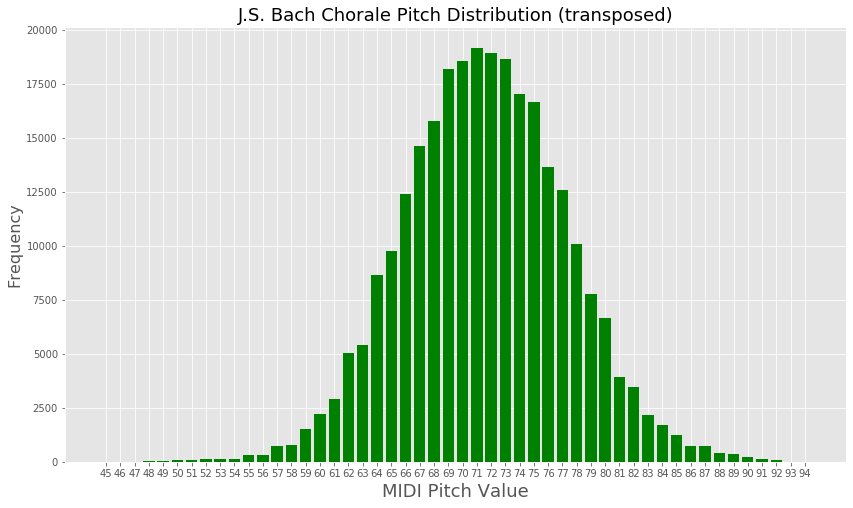

In [45]:
plt.figure(figsize=(14,8))
plt.bar(range(len(notes)), midi_freq, align='center', color='green')
plt.xticks(range(len(notes)), midi_vals)
plt.xlabel("MIDI Pitch Value", fontsize=18)
plt.ylabel("Frequency", fontsize=16)
plt.title("J.S. Bach Chorale Pitch Distribution (transposed)", fontsize=18)
plt.savefig('../figures/trans_midipitch_distr.png', dpi=300)
plt.show()

In [16]:
melRange = list(trans_notes_dict.keys())
melRange.sort()

In [17]:
#melRange

[45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94]

In [18]:
len(melRange)

50